In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/df_no_outliers.csv')

df.rename(columns={'date': 'date'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     19430 non-null  int64         
 1   id             19430 non-null  int64         
 2   date           19430 non-null  datetime64[ns]
 3   price          19430 non-null  float64       
 4   bedrooms       19430 non-null  int64         
 5   bathrooms      19430 non-null  float64       
 6   sqft_living    19430 non-null  int64         
 7   sqft_lot       19430 non-null  int64         
 8   floors         19430 non-null  float64       
 9   waterfront     19430 non-null  int64         
 10  view           19430 non-null  int64         
 11  condition      19430 non-null  int64         
 12  grade          19430 non-null  int64         
 13  sqft_above     19430 non-null  int64         
 14  sqft_basement  19430 non-null  int64         
 15  yr_built       1943

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,decade_built
0,15924,7533800170,2014-07-07,1636000.0,3,2.50,3110,6765,2.0,0,...,560,1946,0,98115,47.6886,-122.276,2630,7626,7,1940
1,17324,9809000010,2015-01-06,1629000.0,5,2.50,3090,16583,2.0,0,...,0,1964,0,98004,47.6458,-122.218,3740,17853,1,1960
2,14233,5318101565,2014-07-03,1625000.0,4,3.25,2980,3600,2.0,0,...,830,1999,0,98112,47.6352,-122.284,2980,4800,7,1990
3,11843,2450500060,2014-08-26,1620000.0,4,3.25,3820,8114,2.0,0,...,0,2005,0,98004,47.5837,-122.194,2440,9195,8,2000
4,16268,3025300250,2015-05-13,1620000.0,4,2.25,2350,17709,2.0,0,...,0,1977,0,98039,47.6232,-122.236,3360,19855,5,1970


In [33]:
def years_since_completion_of_work(yr_renovated, yr_built):
    if yr_renovated == 0:
        return datetime.now().year - yr_built 
    else:
        return datetime.now().year - yr_renovated
    
df['years_since_completion_of_work'] = df.apply(lambda x: years_since_completion_of_work(x['yr_renovated'], x['yr_built']), axis=1)

df.head(100).sort_values(by='yr_renovated', ascending=False)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,decade_built,year_since_completion_of_work,years_since_completion_of_work
47,19276,2397100705,2014-07-14,1518630.0,4,4.25,3650,5328,1.5,0,...,2014,98119,47.6380,-122.362,1710,3600,7,1900,10,10
64,4743,31000165,2014-09-11,1490000.0,5,3.50,3620,7821,2.0,0,...,2010,98040,47.5738,-122.215,2690,9757,9,1950,14,14
49,2781,5701500030,2014-06-01,1505000.0,4,3.50,3480,7232,2.0,0,...,2010,98144,47.5859,-122.291,2380,5642,6,1920,14,14
44,9556,3179100180,2015-05-07,1540000.0,5,3.25,2920,6960,2.0,0,...,2008,98105,47.6712,-122.272,2470,6735,5,1950,16,16
90,18005,5494000040,2014-12-01,1444000.0,4,2.75,2660,9547,1.0,0,...,2006,98004,47.6160,-122.218,2410,10001,12,1960,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,3526,6448000090,2014-05-12,1575000.0,5,2.75,3650,20150,1.0,0,...,0,98004,47.6215,-122.224,3220,19800,5,1970,49,49
28,20144,5021900635,2014-10-28,1575000.0,3,2.00,3620,14250,2.0,0,...,0,98040,47.5767,-122.225,2370,14250,10,2000,17,17
27,3821,5452301810,2014-09-05,1575000.0,5,3.75,4220,9240,2.0,0,...,0,98040,47.5895,-122.229,3380,9240,9,1990,33,33
26,1894,3066120030,2015-01-27,1575000.0,4,3.75,3810,9916,2.0,0,...,0,98040,47.5739,-122.234,3040,11250,1,1980,35,35


<Axes: xlabel='years_since_completion_of_work', ylabel='price'>

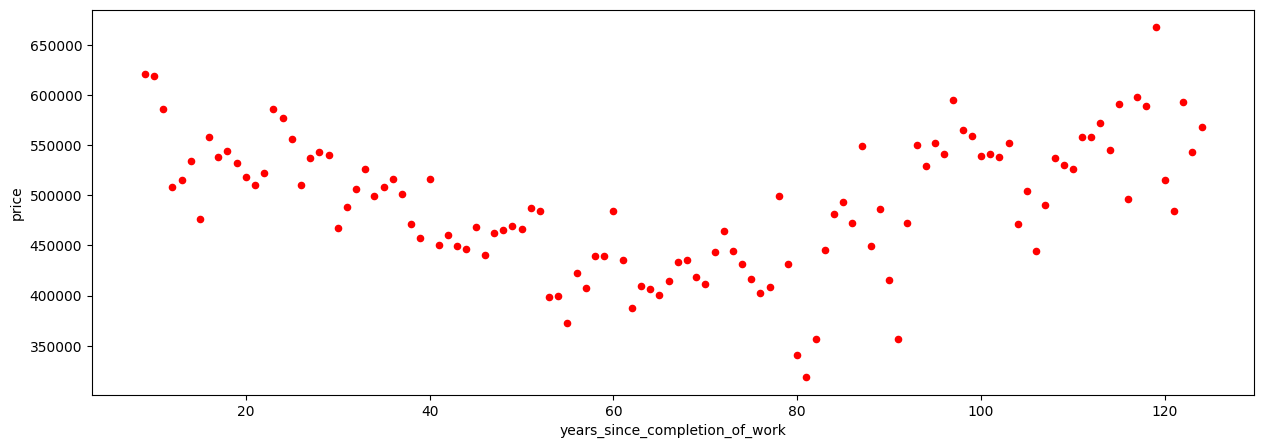

In [29]:
yrs_since_completion_of_work_vs_price = df.groupby('years_since_completion_of_work')['price'].mean().reset_index()
yrs_since_completion_of_work_vs_price.plot(kind='scatter', figsize=(15, 5), x = 'years_since_completion_of_work', y = 'price', color = 'red')


<Axes: xlabel='years_since_completion_of_work', ylabel='condition'>

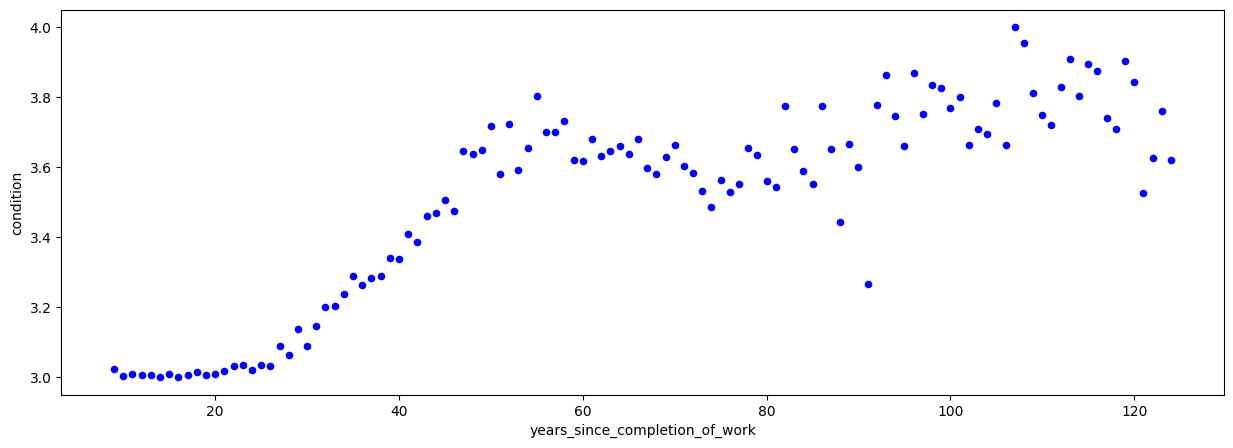

In [30]:
yrs_since_completion_of_work_vs_condition = df.groupby('years_since_completion_of_work')['condition'].mean().reset_index()

yrs_since_completion_of_work_vs_condition.plot(kind='scatter', figsize=(15, 5), x = 'years_since_completion_of_work', y = 'condition', color = 'blue')